In [39]:
# Basic data and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Dash stuff
import dash
import dash_core_components as dcc
import dash_html_components as html

# FbProphet
import json
from fbprophet.serialize import model_to_json, model_from_json


In [ ]:
# Importing Previously Trained Model
with open('initial_prophet_model.json', 'r') as fin:
    model = model_from_json(json.load(fin))  # Load model

In [17]:
# Reading in data
data = pd.read_csv("msa_merged_data.csv")
data["BEGIN_DATE_GMT"] = pd.to_datetime(data["BEGIN_DATE_GMT"])
data["Weighted_Avg_Temp.1_hour_lag"] = data["Weighted_Avg_Temp"].shift(1)
data.head()

,BEGIN_DATE_GMT,HE,POOL_PRICE,AIL_DEMAND,Avg_temp,Weighted_Avg_Temp,future 1,future 2,future 3,future 4,WTI spot,dayofweek,month,year,holiday,workingday,Weighted_Avg_Temp.1_hour_lag
0,2010-01-01 07:00:00,1,51.12,8307.0,-24.100,-22.952601,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,NaN
1,2010-01-01 08:00:00,2,48.79,8186.0,-23.775,-22.588126,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,-22.952601
2,2010-01-01 09:00:00,3,39.56,8075.0,-23.425,-22.339761,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,-22.588126
3,2010-01-01 10:00:00,4,36.27,8013.0,-23.000,-21.877969,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,-22.339761
4,2010-01-01 11:00:00,5,36.16,7982.0,-22.400,-21.527531,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,-21.877969


In [43]:
data['year'] = data['BEGIN_DATE_GMT'].dt.year
data.set_index("BEGIN_DATE_GMT", inplace=True)

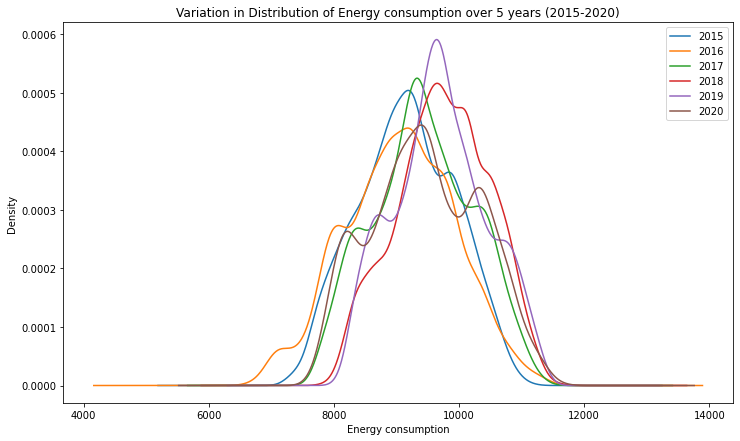

In [41]:
for year in range(2015,2021):
    data[data['year'] == year]['AIL_DEMAND'].plot(kind='density', figsize = (12,7), legend = True, label = year)
_ = plt.xlabel('Energy consumption')
_ = plt.title('Variation in Distribution of Energy consumption over 5 years (2015-2020)')

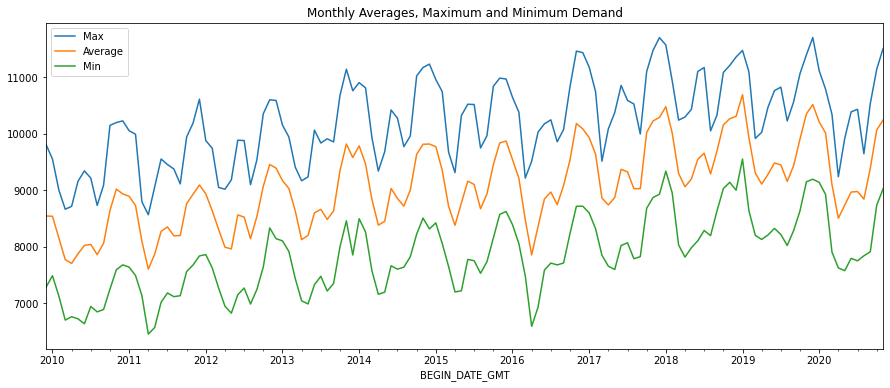

In [53]:
month_peaks = data.resample('M', label = 'left')['AIL_DEMAND'].max()
month_avg = data.resample('M', label = 'left')['AIL_DEMAND'].mean()
month_troughs = data.resample('M', label = 'left')['AIL_DEMAND'].min()

_ = plt.figure(figsize = (15,6))

month_peaks.plot( label = "Max", legend = True)
month_avg.plot(label = "Average", legend = True)
month_troughs.plot( label = "Min", legend = True)

_ = plt.title("Monthly Averages, Maximum and Minimum Demand")

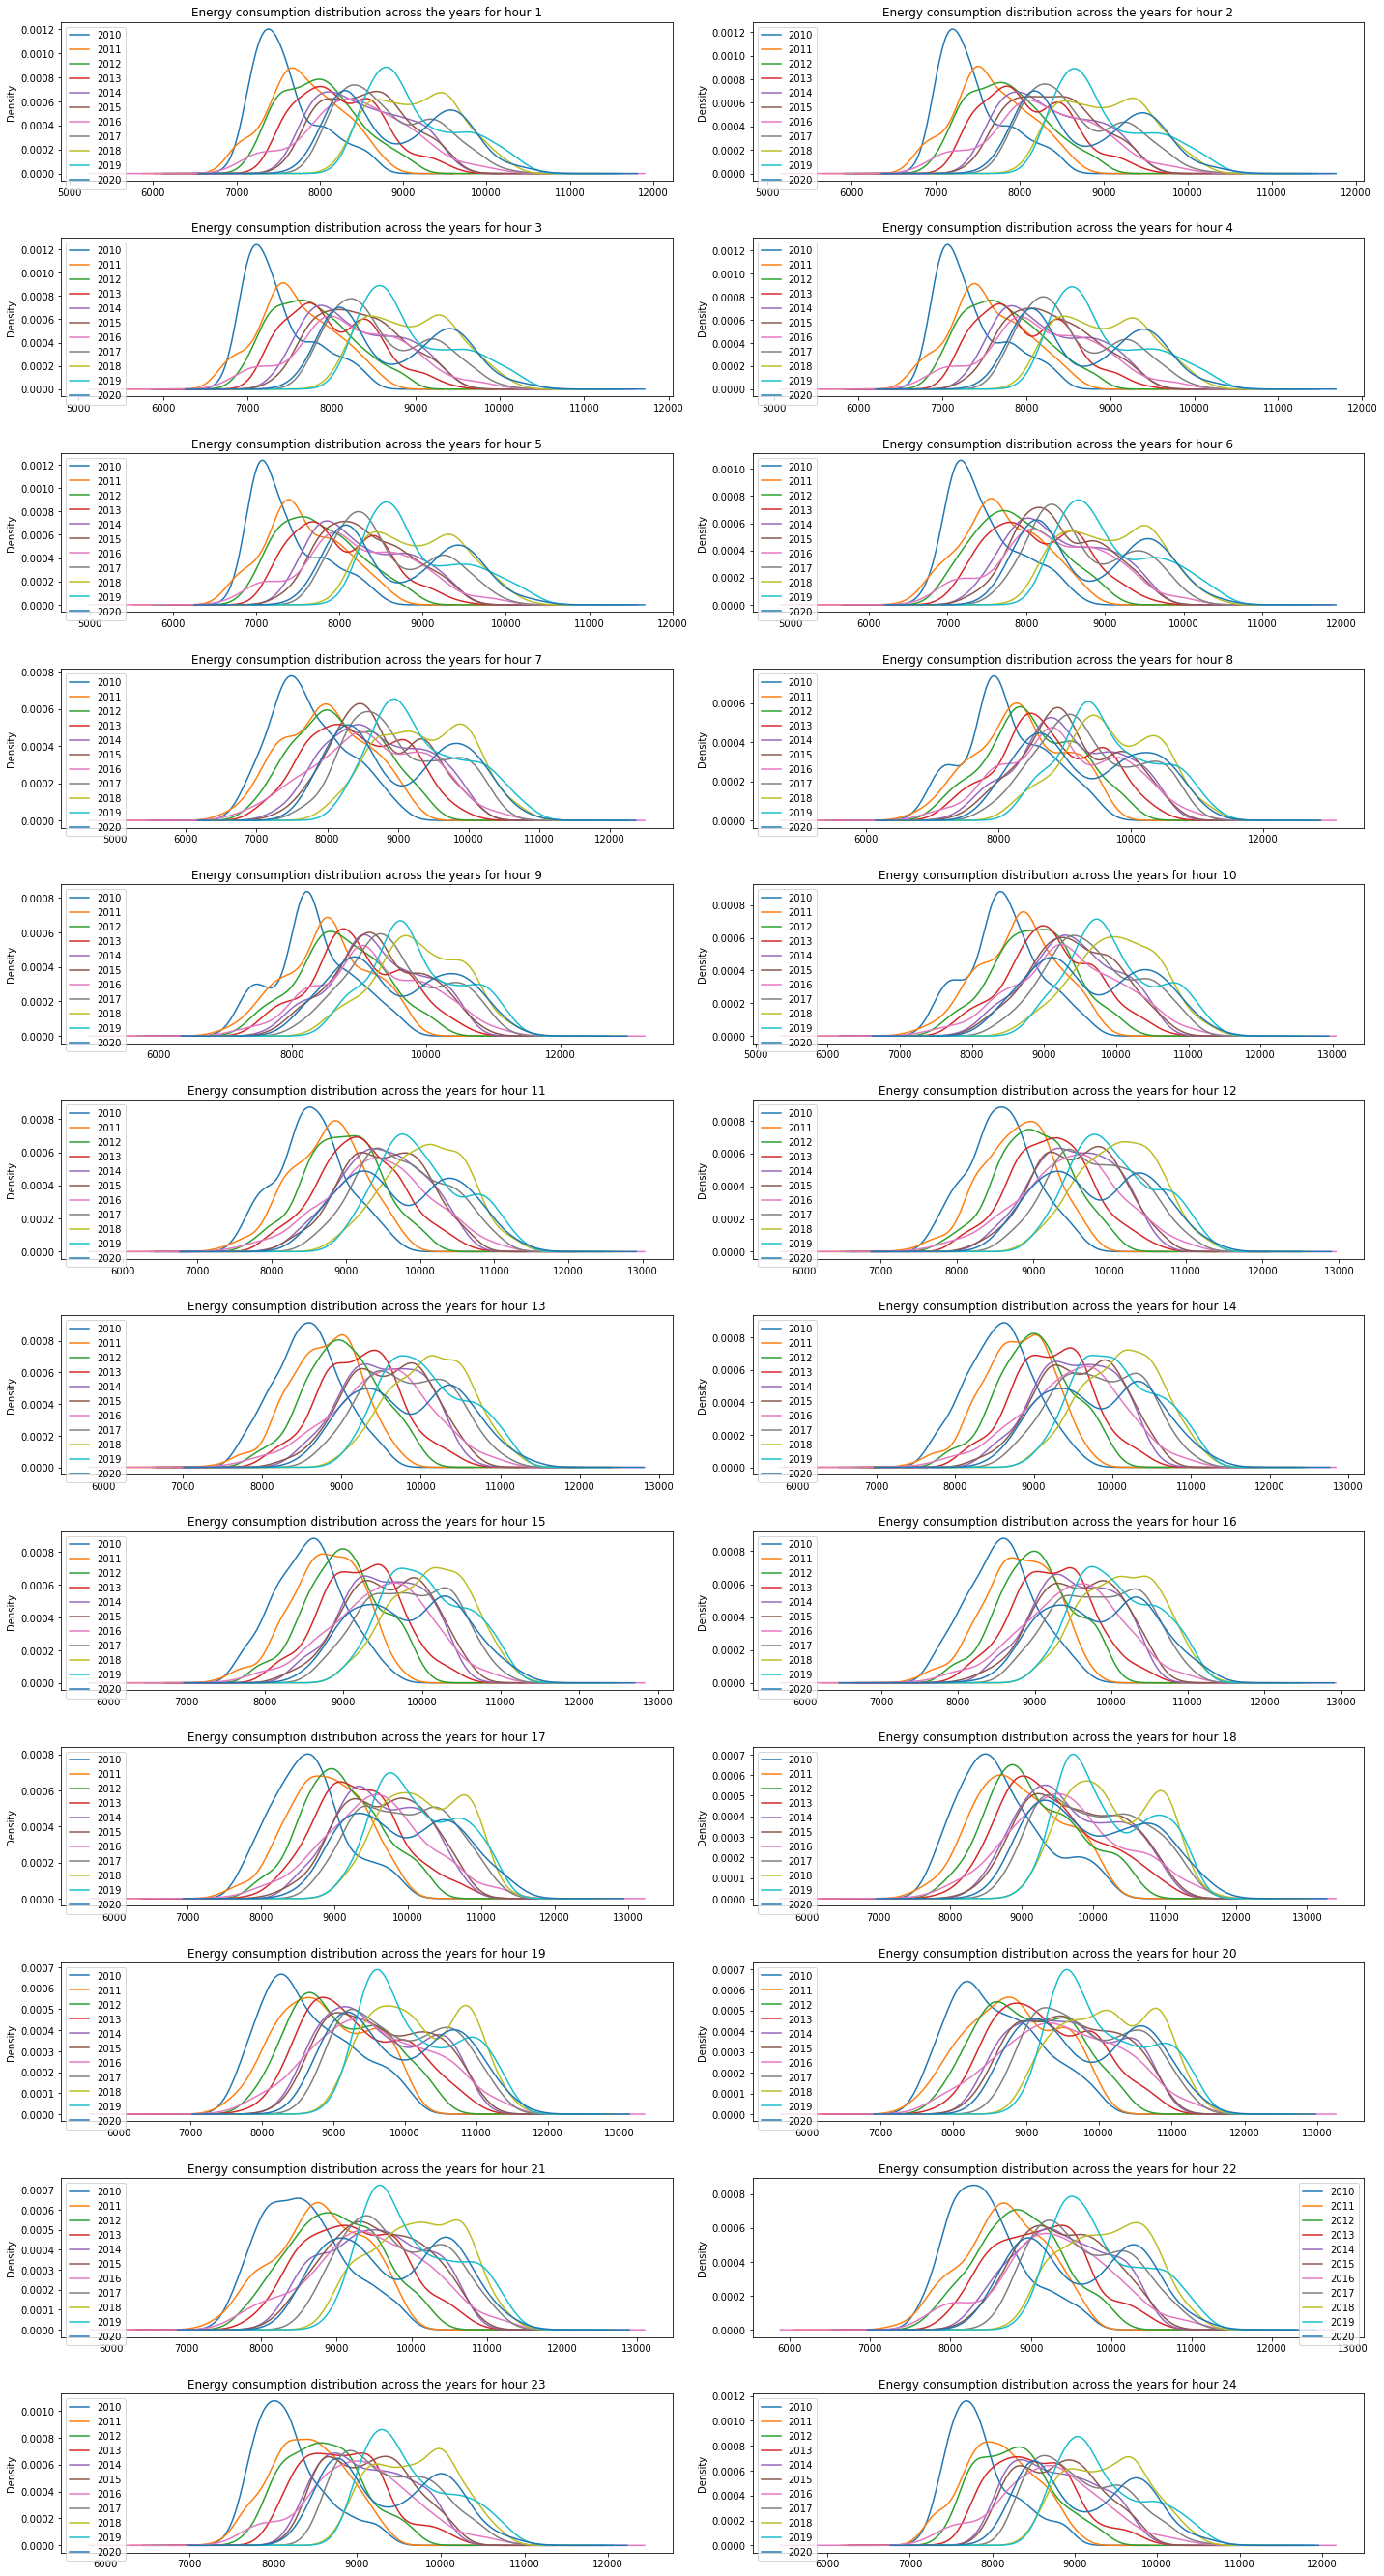

In [66]:
f = plt.figure(figsize = (20,40))
peak_hours = np.arange(0,24) 
for i, hour in enumerate(peak_hours) :
    ax = f.add_subplot(13,2,i+1)
    for j, year in enumerate(data['year'].unique()):
        data[(data['year'] == year) & (data['HE'] == str(hour+1)) ]['AIL_DEMAND'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)
    plt.title('Energy consumption distribution across the years for hour '+ str(hour + 1))
    #plt.xlim(np.min(data.SDGE.values), np.max(data.SDGE.values))
plt.tight_layout()

In [63]:
data["HE"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '02X'], dtype=object)

In [ ]:
app = dash.Dash()

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(host='127.0.0.1', port=8000, debug=False)